# Simulating and studying an AR process

In [166]:
import numpy as np
from pandas import DataFrame as df
import importlib
import autoregressive as ar
from tqdm import trange

In [167]:
importlib.reload(ar) # if autoregressive.py is modified 

<module 'autoregressive' from 'c:\\Users\\alber\\python_projects\\fundamentals_of_interest_rates\\autoregressive.py'>

In [168]:
model = ar.AutoRegressive(steps=1000, paths=10, a=np.array([0.2, 0.2, 0.1]), start=0, dist='normal')
data = model.generate()

100%|██████████| 998/998 [00:00<00:00, 262571.53it/s]

10 different AR(2) processes of 1000 steps have been generated with increments following normal distribution


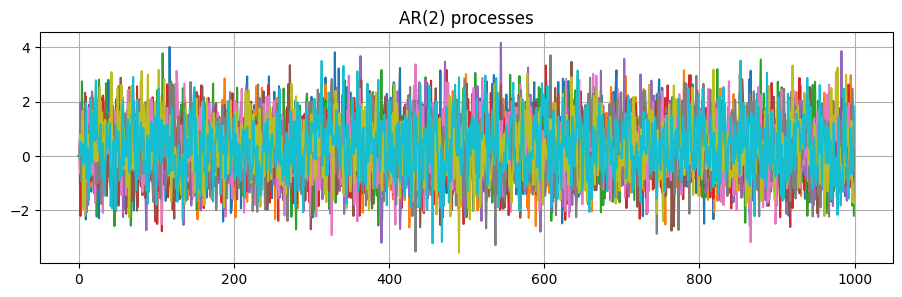

In [169]:
model.plot_paths(data=data)

In [170]:
coefficients = model.fit_ar()
df(coefficients).head()

,0,1,2,3,4,5,6,7,8,9
0,0.277338,0.175162,0.201846,0.201688,0.154315,0.159464,0.232965,0.203012,0.217359,0.251530
1,0.209688,0.148178,0.197615,0.184504,0.198869,0.119531,0.195310,0.185319,0.239329,0.203062
2,0.062219,0.138052,0.109666,0.058287,0.047820,0.091360,0.091892,0.096158,0.075079,0.056260


In [171]:
comparison = np.vstack([model.coefficients.mean(axis=1), model.a])
df(comparison.T).rename(columns={0: 'Average estimated coefficients', 1: 'Real coefficients'})

,Average estimated coefficients,Real coefficients
0,0.207468,0.2
1,0.188141,0.2
2,0.082679,0.1


In [172]:
moments, jb, acf, stat = model.study_errors(20)



100%|██████████| 998/998 [00:00<00:00, 194720.91it/s]



STUDYING ERRORS




DESCRIPTIVE STATISTICS


,0,1,2,3,4,5,6,7,8,9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000228,0.000310,0.000932,-0.000069,0.000611,-0.000031,-0.000357,-0.000544,0.001358,-0.000284
std,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500
min,-2.713375,-2.847800,-2.858284,-2.960015,-3.156235,-2.963298,-3.367690,-3.609356,-3.746072,-3.387787
25%,-0.693633,-0.669549,-0.653235,-0.651342,-0.672628,-0.698520,-0.655675,-0.692955,-0.669346,-0.679817
50%,0.027249,-0.052172,-0.035034,0.000443,-0.000201,0.007372,-0.016972,0.039017,0.005736,-0.017877
75%,0.643777,0.704032,0.647936,0.661101,0.672310,0.696594,0.660632,0.709574,0.626840,0.690221
max,3.431947,2.879059,3.332916,2.986519,3.677008,3.273987,2.925800,3.252097,2.908747,3.023839




MOMENTS SUMMARY


,0,1,2,3,4,5,6,7,8,9
mean,0.000228,0.000310,0.000932,-0.000069,0.000611,-0.000031,-0.000357,-0.000544,0.001358,-0.000284
variance,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
skewness,0.044139,0.021372,0.101116,-0.078731,0.048707,0.008290,-0.029769,-0.080950,0.029621,0.057806
kurtosis,3.018247,2.744136,3.101600,2.885763,3.109913,2.897901,2.998601,3.016460,3.025330,2.968145




JARQUE–BERA NORMALITY TEST RESULTS


,0,1,2,3,4,5,6,7,8,9
jb stat,0.338582,2.803900,2.134179,1.576856,0.898767,0.445795,0.147785,1.103452,0.172969,0.599194
p value,0.844263,0.246117,0.344008,0.454559,0.638021,0.800197,0.928771,0.575955,0.917150,0.741117




AUTOCORRELATION FUNCTION (ACF)


,0,1,2,3,4,5,6,7,8,9
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.078881,0.162360,0.136415,0.070752,0.059766,0.104023,0.113762,0.118046,0.097733,0.070841
2,0.214522,0.170901,0.211752,0.188143,0.201280,0.128984,0.204922,0.196308,0.245347,0.206657
3,0.032821,0.065607,0.052790,-0.025710,0.016199,0.002792,0.075867,0.013051,0.062522,-0.015865
4,0.097612,0.008607,0.044922,-0.019291,0.026831,0.076485,0.112107,0.092370,0.094804,0.014181
5,0.019801,0.010603,0.007479,-0.055768,0.029337,0.023043,0.011322,0.033819,0.058904,0.005882
6,0.004934,-0.002405,0.005290,-0.055668,-0.036839,0.017161,0.041978,0.039573,0.043977,0.024324
7,0.013723,-0.012554,-0.032174,-0.063564,0.070564,-0.023674,-0.011029,0.014402,-0.031653,0.033349
8,0.012833,0.058025,0.011404,-0.022457,0.014580,-0.008815,0.029422,-0.041191,0.012348,0.020721
9,0.025743,0.051068,0.019257,-0.029761,0.012125,0.005986,0.047696,0.024498,-0.077928,0.011773




STUDYING ERRORS




DESCRIPTIVE STATISTICS


,0,1,2,3,4,5,6,7,8,9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.000502,-0.000210,-0.000124,0.000538,0.000399,-0.000259,-0.000352,-0.000996,-0.000046,0.000458
std,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500
min,-3.597827,-3.042355,-3.264726,-3.011174,-3.342515,-3.852305,-3.150908,-3.554530,-2.772200,-3.563860
25%,-0.663090,-0.697472,-0.720655,-0.670072,-0.662523,-0.700991,-0.693992,-0.630812,-0.697186,-0.659943
50%,0.002183,0.017024,0.019194,-0.001488,-0.015224,0.009181,0.017339,-0.021201,-0.007613,0.003350
75%,0.685868,0.667445,0.706832,0.699984,0.621541,0.631720,0.642117,0.650729,0.678385,0.681190
max,3.553100,3.013442,3.834556,3.012716,3.120699,3.509388,2.739755,3.314086,3.378285,3.125123




MOMENTS SUMMARY


,0,1,2,3,4,5,6,7,8,9
mean,-0.000502,-0.000210,-0.000124,0.000538,0.000399,-0.000259,-0.000352,-0.000996,-0.000046,0.000458
variance,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
skewness,-0.029998,0.010445,-0.055363,0.009369,0.092178,-0.015142,0.005483,-0.008289,0.056787,-0.051411
kurtosis,2.942030,2.895982,2.943002,2.954140,3.063784,3.146463,3.003328,3.214140,2.819258,2.895774




JARQUE–BERA NORMALITY TEST RESULTS


,0,1,2,3,4,5,6,7,8,9
jb stat,0.290004,0.469003,0.646210,0.102259,1.585655,0.932024,0.005473,1.922118,1.898616,0.893133
p value,0.865021,0.790965,0.723898,0.950155,0.452563,0.627500,0.997267,0.382488,0.387009,0.639821




AUTOCORRELATION FUNCTION (ACF)


,0,1,2,3,4,5,6,7,8,9
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.143260,0.167547,0.123679,0.044223,0.148158,0.150691,0.082193,0.169130,0.139472,0.146821
2,0.180960,0.251029,0.201892,0.209879,0.240037,0.230525,0.175174,0.227590,0.241064,0.264795
3,0.092141,0.050865,0.030769,0.033587,0.066288,0.095714,0.082686,0.126242,0.076571,0.085499
4,0.013792,0.102374,0.015906,0.073295,0.010372,0.071637,0.044919,0.071149,0.064298,0.049182
5,0.044281,0.034061,-0.063365,-0.003075,-0.036887,0.055925,-0.000512,0.040254,0.067144,0.033894
6,-0.017854,0.053948,-0.039334,0.010684,-0.008940,0.024826,0.011400,0.030729,0.033122,0.070743
7,-0.022797,0.021994,-0.001866,-0.029536,-0.026106,0.049738,0.007583,0.008920,0.043366,0.039687
8,-0.023933,-0.005234,-0.043122,0.024440,0.009606,0.006805,0.068784,0.038416,0.008593,0.032832
9,-0.014039,-0.005886,-0.012426,0.028720,-0.020696,0.019521,-0.034148,0.053112,0.020537,0.034509


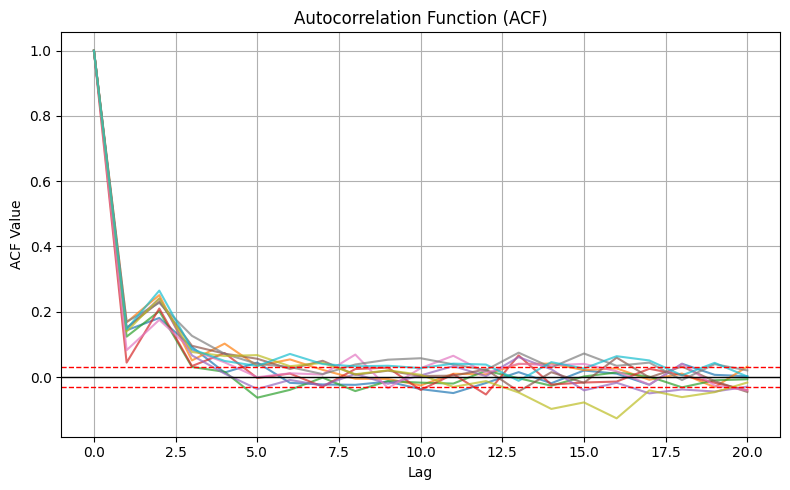

In [ ]:
print("\n")
print("="*100)
print("STUDYING ERRORS")
print("="*100)
print("\n")

print("\n")
print("="*50)
print("DESCRIPTIVE STATISTICS")
print("="*50)
display(df(self.epsilon).describe())

print("\n")
print("="*50)
print("MOMENTS SUMMARY")
print("="*50)
display(self.moments)

print("\n")
print("="*50)
print("JARQUE–BERA NORMALITY TEST RESULTS")
print("="*50)
display(self.jb_summary)

print("\n")
print("="*50)
print("AUTOCORRELATION FUNCTION (ACF)")
print("="*50)
display(self.acf)

model.plot_acf(acf_summary = model.acf)


